## Numeryczne Rozwiązywanie Rónań Różniczkowych Zwyczajnych
### Uniwersytet Jagielloński 2023
Katedra Teorii Optymalizacji i Sterowania UJ

In [7]:
import numpy as np
from numpy import sin, cos, exp, sqrt
import matplotlib.pyplot as plt
import math

## Równanie różniczkowe zwyczajne rzędu 2

Każde równanie różniczkowe rzędu n można traktować jako układ równań n równań różniczkowych rzędu 1.

Rozważmy RRZ rzędu 2:

$x''(t) = f(t, x, x')$

$t \in [a, b]$   

$x(a) = \alpha, \quad x'(a) = \gamma$

Zastosujmy podstawienie: $y = x'$, wtedy:

$x'(t) = y = f_0(t, x, y)$

$y'(t) = f_1(t, x, y)$

Przechodząc na przestrzeń wektorów $R^2$ mamy dobrze znane równanie:

$𝐱'(t) = 𝐟(t, 𝐱)$

z warunkiem początkowym $𝐱(a) = (\alpha, \gamma)$.

In [2]:
def rk4(dxdt, t, x, h):
    k1 = h * dxdt(t, x[-1])
    k2 = h * dxdt(t + 0.5 * h, x[-1] + 0.5 * k1)
    k3 = h * dxdt(t + 0.5 * h, x[-1] + 0.5 * k2)
    k4 = h * dxdt(t + h, x[-1] + k3)
    return x[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def initial_value_problem(f, h=0.01, a=0, b=1, alpha=0, gamma=1):
    y = [np.asarray([alpha, gamma])]
    t = [a]
    def fp(t, y):
        return np.asarray([y[1], f(t, y)])
    next_t = t[-1] + h
    while next_t <= b:
        y.append(rk4(fp, t[-1], y, h))
        t.append(next_t)
        next_t += h
    return np.asarray(t), np.asarray(y)

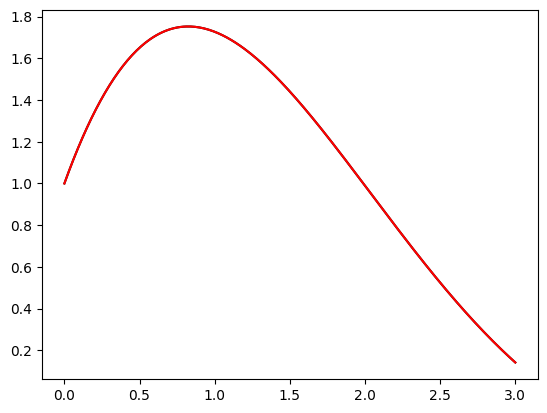

In [3]:
t, x = initial_value_problem(f=lambda t, x: -x[1] - x[0], a=0, b=3, alpha=1, gamma=2, h=0.01)
plt.plot(t, x[:, 0], color="black")
plt.plot(t, exp(-0.5 * t) * (5/sqrt(3) * sin(sqrt(3) / 2 * t) + cos(sqrt(3) / 2 * t)), color="red")

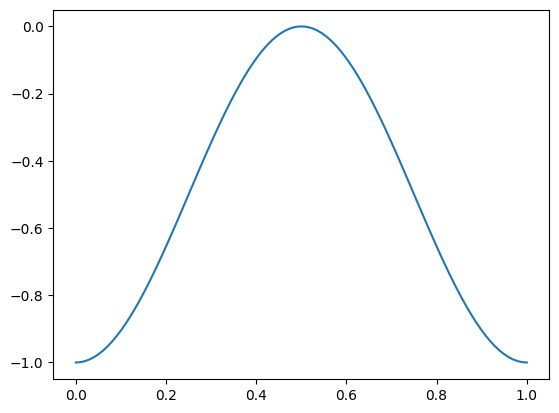

In [15]:
def exact(t):
  e = math.e
  return (e ** (20 * t)) / ((e ** 20)*((1 + e ** 20))) + 1 / ((e ** (20 * t))*(e ** 20)*((1 + e ** 20))) - (math.cos(math.pi * t) ** 2)

ts = np.linspace(0,1, 100)
z = [exact(t) for t in ts]
plt.plot(ts, z)

In [ ]:
x0 = -1
x1 = 0

def y(t):
  400 * x(t) + 400 * (math.cos(math.pi * t) ** 2) + 2 * (math.pi ** 2) * math.cos(2 * t * math.pi ** 2)

## Metoda strzałów


In [ ]:
x0 = -1
x1 = 0

#### Funkcja phi

In [ ]:
def phi(z):


#### Pochodna funkcji phi

In [ ]:
def d_phi(z):
    pass

#### Metoda Newtona

In [ ]:
def newton(function, initial_value):
    xn = initial_value
    max_iter = 1000
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            return None
        xn = xn - fxn/Dfxn
    return None

In [ ]:
x_shooting = newton(phi, z)


In [ ]:
plt.plot(t, x_shooting, color="olive")
plt.plot(t, exact(t), color="red")
plt.grid()

## Metoda różnic skończonych


#### Konstrukcja układu równań

In [16]:
alpha = -1
beta = 0
a = 0
b = 1
n = 100
h = (b - a) / (n - 1)

t = [0] * n

for i in range(n):
  t[i] = a + i * h



[-1.0, -0.98989898989899, -0.9797979797979798, -0.9696969696969697, -0.9595959595959596, -0.9494949494949495, -0.9393939393939394, -0.9292929292929293, -0.9191919191919192, -0.9090909090909091, -0.898989898989899, -0.8888888888888888, -0.8787878787878788, -0.8686868686868687, -0.8585858585858586, -0.8484848484848485, -0.8383838383838383, -0.8282828282828283, -0.8181818181818181, -0.8080808080808081, -0.797979797979798, -0.7878787878787878, -0.7777777777777778, -0.7676767676767676, -0.7575757575757576, -0.7474747474747474, -0.7373737373737373, -0.7272727272727273, -0.7171717171717171, -0.7070707070707071, -0.696969696969697, -0.6868686868686869, -0.6767676767676767, -0.6666666666666666, -0.6565656565656566, -0.6464646464646464, -0.6363636363636364, -0.6262626262626263, -0.6161616161616161, -0.606060606060606, -0.5959595959595959, -0.5858585858585859, -0.5757575757575757, -0.5656565656565656, -0.5555555555555556, -0.5454545454545454, -0.5353535353535352, -0.5252525252525252, -0.515151515

#### Rozwiązanie układu równań

In [ ]:
x_finite_diff = np.linalg.solve(a, b)


In [ ]:
plt.plot(t, x_finite_diff, color="green")
plt.plot(t, exact(t), color="red")
plt.grid()

